In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

# 1. Aquisition de donnés

In [4]:
data=np.array([[236,264,281,56,99,493,87,36],
[305,247,301,47,115,624,90,42],
[145,133,135,30,52,281,54,20],
[470,400,876,16,74,312,62,21],
[80,99,65,28,36,134,58,11],
[168,137,208,53,74,312,62,21],
[16,11,8,2,6,27,8,2],
[6,6,4,1,2,15,4,1],
[126,193,127,23,64,401,129,28]]
)
pd.DataFrame(data)

,0,1,2,3,4,5,6,7
0,236,264,281,56,99,493,87,36
1,305,247,301,47,115,624,90,42
2,145,133,135,30,52,281,54,20
3,470,400,876,16,74,312,62,21
4,80,99,65,28,36,134,58,11
5,168,137,208,53,74,312,62,21
6,16,11,8,2,6,27,8,2
7,6,6,4,1,2,15,4,1
8,126,193,127,23,64,401,129,28


# Réponse 1
Matrice des fréquences relatives

In [5]:
data=data/data.sum()

In [6]:
pd.DataFrame(data)

,0,1,2,3,4,5,6,7
0,0.025764,0.028821,0.030677,0.006114,0.010808,0.053821,0.009498,0.003930
1,0.033297,0.026965,0.032860,0.005131,0.012555,0.068122,0.009825,0.004585
2,0.015830,0.014520,0.014738,0.003275,0.005677,0.030677,0.005895,0.002183
3,0.051310,0.043668,0.095633,0.001747,0.008079,0.034061,0.006769,0.002293
4,0.008734,0.010808,0.007096,0.003057,0.003930,0.014629,0.006332,0.001201
5,0.018341,0.014956,0.022707,0.005786,0.008079,0.034061,0.006769,0.002293
6,0.001747,0.001201,0.000873,0.000218,0.000655,0.002948,0.000873,0.000218
7,0.000655,0.000655,0.000437,0.000109,0.000218,0.001638,0.000437,0.000109
8,0.013755,0.021070,0.013865,0.002511,0.006987,0.043777,0.014083,0.003057


In [7]:
Xl=np.copy(data)
Xc=np.copy(data)
for i in range(Xl.shape[0]):
    Xl[i]/=np.sum(Xl[i])


In [8]:
for i in range(Xc.shape[1]):
    Xc[:,i]/=np.sum(Xc[:,i])

Matrice profil-lignes

In [9]:
pd.DataFrame(Xl)

,0,1,2,3,4,5,6,7
0,0.152062,0.170103,0.181057,0.036082,0.063789,0.317655,0.056057,0.023196
1,0.172219,0.139469,0.169960,0.026539,0.064935,0.352343,0.050819,0.023715
2,0.170588,0.156471,0.158824,0.035294,0.061176,0.330588,0.063529,0.023529
3,0.210668,0.179292,0.392649,0.007172,0.033169,0.139848,0.027790,0.009413
4,0.156556,0.193738,0.127202,0.054795,0.070450,0.262231,0.113503,0.021526
5,0.162319,0.132367,0.200966,0.051208,0.071498,0.301449,0.059903,0.020290
6,0.200000,0.137500,0.100000,0.025000,0.075000,0.337500,0.100000,0.025000
7,0.153846,0.153846,0.102564,0.025641,0.051282,0.384615,0.102564,0.025641
8,0.115490,0.176902,0.116407,0.021082,0.058662,0.367553,0.118240,0.025665


matrice profils-colonne

In [10]:
pd.DataFrame(Xc)

,0,1,2,3,4,5,6,7
0,0.152062,0.177181,0.140150,0.218750,0.189655,0.189688,0.157040,0.197802
1,0.196521,0.165772,0.150125,0.183594,0.220307,0.240092,0.162455,0.230769
2,0.093428,0.089262,0.067332,0.117187,0.099617,0.108119,0.097473,0.109890
3,0.302835,0.268456,0.436908,0.062500,0.141762,0.120046,0.111913,0.115385
4,0.051546,0.066443,0.032419,0.109375,0.068966,0.051558,0.104693,0.060440
5,0.108247,0.091946,0.103741,0.207031,0.141762,0.120046,0.111913,0.115385
6,0.010309,0.007383,0.003990,0.007812,0.011494,0.010389,0.014440,0.010989
7,0.003866,0.004027,0.001995,0.003906,0.003831,0.005771,0.007220,0.005495
8,0.081186,0.129530,0.063342,0.089844,0.122605,0.154290,0.232852,0.153846


#  Réponse 2
centre de gravité

In [11]:
g=[]
for i in range(data.shape[1]):
    g.append(np.sqrt(np.sum(data[:,i])))
g


[0.41162156698900065,
 0.4033159499183181,
 0.4678530355593475,
 0.16717535181142915,
 0.23871929030415362,
 0.5326665227458437,
 0.24592752864406656,
 0.14095742489556118]

Matrice transformée centrée Y

In [12]:
Yl=np.copy(Xl)
for i in range(Yl.shape[0]):
    for j in range(Yl.shape[1]):
        Yl[i][j]/=g[j]
        Yl[i][j]-=g[j]
pd.DataFrame(Yl)

,0,1,2,3,4,5,6,7
0,-0.042200,0.018445,-0.080858,0.048661,0.028493,0.063682,-0.017988,0.023602
1,0.006770,-0.057510,-0.104576,-0.008428,0.033295,0.128804,-0.039286,0.027288
2,0.002808,-0.015356,-0.128380,0.043945,0.017550,0.087962,0.012398,0.025968
3,0.100178,0.041228,0.371404,-0.124276,-0.099774,-0.270124,-0.132926,-0.074180
4,-0.031282,0.077046,-0.195969,0.160591,0.056398,-0.040368,0.215602,0.011758
5,-0.017282,-0.075119,-0.038303,0.139136,0.060786,0.033258,-0.002346,0.002986
6,0.074262,-0.062392,-0.254111,-0.017632,0.075457,0.100938,0.160696,0.036401
7,-0.037865,-0.021863,-0.248630,-0.013797,-0.023898,0.189390,0.171123,0.040949
8,-0.131047,0.035303,-0.219042,-0.041071,0.007016,0.157358,0.234865,0.041115


Matrice des poids

In [13]:
Dl=np.zeros((Xl.shape[0],Xl.shape[0]))
for i in range(Dl.shape[0]):
    Dl[i][i]=np.sum(data[i])
pd.DataFrame(Dl)

,0,1,2,3,4,5,6,7,8
0,0.169432,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.193341,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.092795,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.243559,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.055786,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.112991,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008734,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004258,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.119105


Matrice d'inertie

In [14]:
Vl=np.matmul(np.matmul(Yl.T,Dl),Yl)
pd.DataFrame(Vl)

,0,1,2,3,4,5,6,7
0,0.004944,0.000219,0.013181,-0.003300,-0.002864,-0.009270,-0.007124,-0.002587
1,0.000219,0.002286,0.003546,-0.001717,-0.001591,-0.003938,0.000859,-0.000837
2,0.013181,0.003546,0.047198,-0.013494,-0.011503,-0.033192,-0.020143,-0.009233
3,-0.003300,-0.001717,-0.013494,0.008186,0.004689,0.008215,0.004701,0.002444
4,-0.002864,-0.001591,-0.011503,0.004689,0.003458,0.008124,0.003858,0.002246
5,-0.009270,-0.003938,-0.033192,0.008215,0.008124,0.025791,0.011861,0.006847
6,-0.007124,0.000859,-0.020143,0.004701,0.003858,0.011861,0.014185,0.003524
7,-0.002587,-0.000837,-0.009233,0.002444,0.002246,0.006847,0.003524,0.001870


Calcul des valeurs propres et vecteurs propres

In [15]:
valeurs_propres, vecteurs_propres = np.linalg.eig(Vl)
valeurs_propres
vecteurs_propres=vecteurs_propres.T

In [16]:
print("valeurs propres : ")
for i in range(valeurs_propres.shape[0]):
    print("lambda",str(i+1)," : ",valeurs_propres[i])
print("vecteurs propres : ")
for i in range(vecteurs_propres.shape[0]):
    print("u",str(i+1)," : ",vecteurs_propres[i])

valeurs propres : 
lambda 1  :  0.09198901415464537
lambda 2  :  0.008836297589223312
lambda 3  :  0.005325547800581784
lambda 4  :  0.0008921452629229111
lambda 5  :  0.0008107984657908498
lambda 6  :  6.395577509456189e-05
lambda 7  :  -3.87045714056678e-19
lambda 8  :  7.990881081104177e-07
vecteurs propres : 
u 1  :  [-0.20522746 -0.05639046 -0.71458067  0.20513566  0.17485371  0.50696159
  0.30786754  0.14010473]
u 2  :  [-0.21463922  0.40649058  0.00401587 -0.23011979 -0.18572189 -0.33067368
  0.76759591 -0.05179757]
u 3  :  [ 0.06559687  0.03309156 -0.01674611  0.84457972  0.23008721 -0.46037543
  0.10681794 -0.06863618]
u 4  :  [ 0.83712964 -0.21954101 -0.34459795 -0.21326938  0.02923087 -0.20763487
  0.20319654 -0.03909756]
u 5  :  [ 0.12490783  0.77309834 -0.38261242 -0.02571777 -0.08708563 -0.12619667
 -0.44699117  0.12787768]
u 6  :  [ 1.46516800e-01 -5.02539019e-02  3.55736133e-04  3.42865095e-01
 -9.00825703e-01  2.10345355e-01  4.08393930e-02 -3.24160768e-02]
u 7  :  [0.

In [17]:
taux_inertie=[]
taux_inertie_cumule=[]
taux_cum=0
trace=np.trace(Vl)
for i in valeurs_propres:
    taux=(abs(i)/trace)*100
    taux_cum+=taux
    taux_inertie.append(taux)
    taux_inertie_cumule.append(taux_cum)

In [18]:
print("taux d'inertie : ",taux_inertie)
print("taux d'inertie cumulé : ",taux_inertie_cumule)

taux d'inertie :  [85.23929131670496, 8.18793147519418, 4.934784056188347, 0.8266838237364034, 0.7513058734219906, 0.05926299998721887, 3.5864611308798574e-16, 0.0007404547669184781]
taux d'inertie cumulé :  [85.23929131670496, 93.42722279189914, 98.36200684808749, 99.18869067182389, 99.93999654524588, 99.9992595452331, 99.9992595452331, 100.00000000000001]


représentation graphique des taux d'inertie

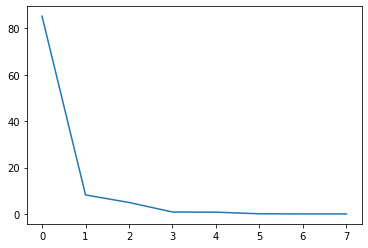

In [19]:
plt.plot(taux_inertie)

Representation graphique des taux d'inertie cumulé

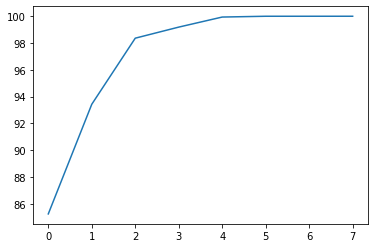

In [20]:
plt.plot(taux_inertie_cumule)

# Réponse 3
facteur ligne

In [21]:
C1=np.matmul(Yl,vecteurs_propres[0])
C2=np.matmul(Yl,vecteurs_propres[1])

In [22]:
print("Première composante principale : ",C1)
print("Deuxième composante principale : ",C2)

Première composante principale :  [ 0.11041733  0.13770107  0.15615962 -0.51948075  0.23247503  0.09088052
  0.28518238  0.3340949   0.33207076]
Deuxième composante principale :  [-0.0363461  -0.1036561  -0.04164741  0.03500875  0.16805172 -0.08323997
  0.03580836  0.07246089  0.1758645 ]


# Réponse 4
Matrice affichant le facteur ligne

In [23]:
C=np.column_stack((C1,C2))
pd.DataFrame(C)

,0,1
0,0.110417,-0.036346
1,0.137701,-0.103656
2,0.156160,-0.041647
3,-0.519481,0.035009
4,0.232475,0.168052
5,0.090881,-0.083240
6,0.285182,0.035808
7,0.334095,0.072461
8,0.332071,0.175864


# Réponse 5 
facteur colonne

In [24]:
f1=np.divide(np.sqrt(valeurs_propres[0]),g)
f2=np.divide(np.sqrt(valeurs_propres[1]),g)
facteur1=f1*vecteurs_propres[0]
facteur2=f2*vecteurs_propres[1]
matrice_projection_profil_colonne=np.column_stack((facteur1,facteur2))
pd.DataFrame(matrice_projection_profil_colonne)

,0,1
0,-0.151219,-0.049017
1,-0.042406,0.094742
2,-0.463244,0.000807
3,0.372166,-0.129395
4,0.222155,-0.073133
5,0.288661,-0.058355
6,0.379686,0.293400
7,0.301462,-0.034543


# Réponse 6
visualisation

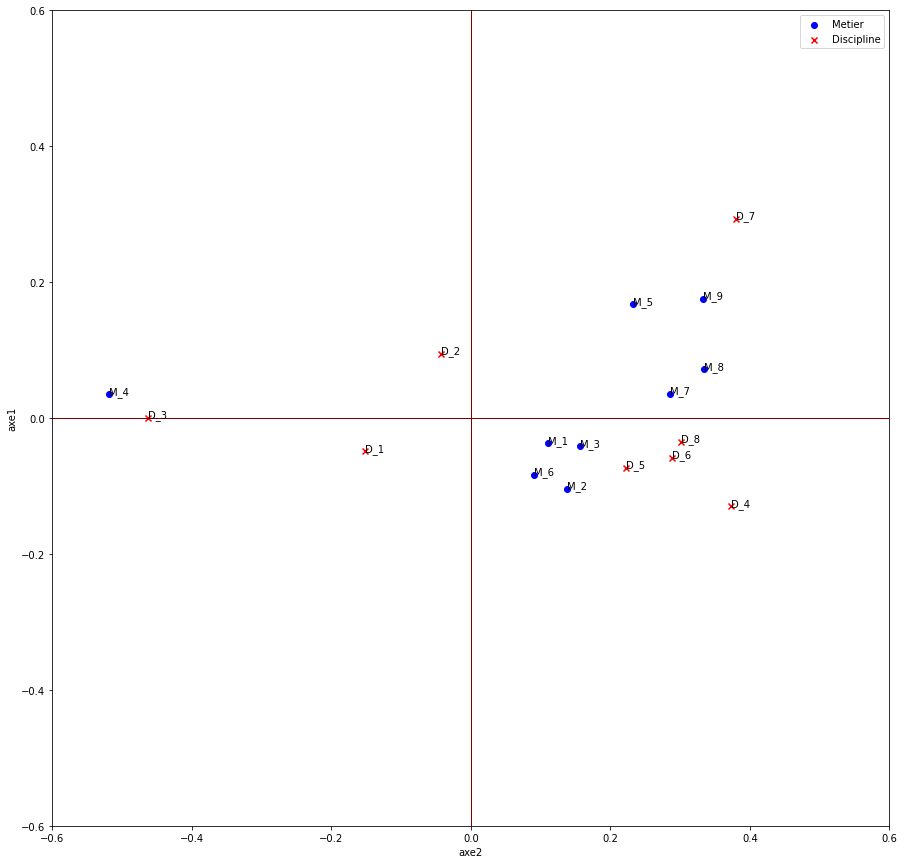

In [25]:
(fig, ax) = plt.subplots(figsize = (15,15))
ax.set_xlim(-0.6,0.6)
ax.set_ylim(-0.6,0.6)

plt.ylabel("axe1")
plt.xlabel("axe2")

plt.plot([-0.6,0.6],[0,0],color='maroon',linestyle='-',linewidth=1)
plt.plot([0,0],[-0.6,0.6],color='maroon',linestyle='-',linewidth=1)

for i in range(0, C1.shape[0]): 
  plt.text(C1[i] , C2[i] , "M_"+str(i+1))
plt.scatter(C1, C2,c='b', marker="o", label="Metier" )

for i in range(0, facteur1.shape[0]):
  plt.text(facteur1[i], facteur2[i] , "D_"+str(i+1))
plt.scatter(facteur1, facteur2, c='r', marker="x" ,label="Discipline")

plt.legend(loc="upper right")
plt.show()

# Réponse 7
qualité de representation des profils lignes

In [26]:
qual_rep=[]
for i in range(Xl.shape[0]):
    qual_rep.append(((C1[i]**2)/np.linalg.norm(Xl[i]))+((C2[i]**2)/np.linalg.norm(Xl[i])))


In [27]:
for i in range(len(qual_rep)):
    print("Qualité de representation de X"+str(i+1)+" : ",qual_rep[i])

Qualité de representation de X1 :  0.03061706002757311
Qualité de representation de X2 :  0.06479190397471296
Qualité de representation de X3 :  0.0587493597617088
Qualité de representation de X4 :  0.5397272907083207
Qualité de representation de X5 :  0.2005775539521381
Qualité de representation de X6 :  0.03513540405445823
Qualité de representation de X7 :  0.18486881215306086
Qualité de representation de X8 :  0.24902628372158125
Qualité de representation de X9 :  0.30680794395223565


qualité de contribution des profils lignes sur chaque axe

In [28]:
qual_cont1=data.sum(axis=1)*C1**2/valeurs_propres[0]
qual_cont2=data.sum(axis=1)*C2**2/valeurs_propres[1]
qual_cont=np.column_stack((qual_cont1,qual_cont2))
pd.DataFrame(qual_cont)

,0,1
0,0.022456,0.025330
1,0.039853,0.235094
2,0.024599,0.018215
3,0.714508,0.033782
4,0.032775,0.178296
5,0.010145,0.088601
6,0.007722,0.001267
7,0.005166,0.002530
8,0.142776,0.416884


In [29]:
qual_cont1.sum()

1.0

 **interpretation** :
 on peut voir que les enfants avec des parents du demaine privee s'oriente le plus vers les etude superieur, avec des parents retraite c'est e totale oppose  

# Réponse 8
qualité de representation des profils colonnes

In [30]:
qual_rep_c=[]
for i in range(Xc.shape[1]):
    qual_rep_c.append(((facteur1[i]**2)/np.linalg.norm(Xc[:,i]))+((facteur2[i]**2)/np.linalg.norm(Xc[:,i])))


In [31]:
for i in range(len(qual_rep_c)):
    print("Qualité de representation de Xc"+str(i+1)+" : ",qual_rep_c[i])

Qualité de representation de Xc1 :  0.05902793467320729
Qualité de representation de Xc2 :  0.02623746779872032
Qualité de representation de Xc3 :  0.4262631706614468
Qualité de representation de Xc4 :  0.3855206925674099
Qualité de representation de Xc5 :  0.13914026960790069
Qualité de representation de Xc6 :  0.2163242963709073
Qualité de representation de Xc7 :  0.59243169202366
Qualité de representation de Xc8 :  0.2312275721684936


qualité de contribution des profils colonnes

In [32]:
Cqual_cont1=data.sum(axis=0)*facteur1**2/valeurs_propres[0]
Cqual_cont2=data.sum(axis=0)*facteur2**2/valeurs_propres[1]
Cqual_cont=np.column_stack((Cqual_cont1,Cqual_cont2))
pd.DataFrame(Cqual_cont)

,0,1
0,0.042118,0.046070
1,0.003180,0.165235
2,0.510626,0.000016
3,0.042081,0.052955
4,0.030574,0.034493
5,0.257010,0.109345
6,0.094782,0.589203
7,0.019629,0.002683


In [33]:
Cqual_cont.sum(axis=0)

array([1., 1.])

**interpretation** : 
on peut voir que la filiere informatique est la plus loin du l'origine et proche de domaine privee  des parents 

#  Réponse 10
**les métiers influençant plus sur le choix des enfants**:
* cadre 
* Responsable
* Technicien
* Privé
* Ouvrier

#  Réponse 11 
 **on peut dire sur le deuxième axe que :**   il est une bordure entre le domaine privee et les autre domaine 

#  Réponse 12 
**Analyser et interpréter les résultats obtenus** : 
* la fillière math n'attire pas beaucour de bacahlerier elle attire  des enfants des arent enseignant  
* les enfants des parents de secteur privee fait beaucoup plus filier informatique 
* les parents de cadre responsable leur enfant s'oriente beuacoup au domaine droit ,letr, bio et phy 
* tout les situation social attire vers psy et GM 